# Module 5 Assessment 

Welcome to your Module 5 Assessment. You will be tested for your understanding of concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. 

**_Read the instructions very carefully!_** You will be asked both to write code and respond to a few short answer questions.  

The goal here is to demonstrate your knowledge. Showing that you know things about certain concepts and how to apply different methods is more important than getting the best model.

The sections of the assessment are:

- Decision Trees
- Ensemble Models 
- PCA
- Clustering

**Note on the short answer questions**: 
> Please use your own words, even if you consult another source to help you craft your response. Short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, but do your best to communicate your answers clearly!


## Decision Trees [Suggested Time: 15 min]

### Concepts 
You're given a dataset of **30** elements, 15 of which belong to a positive class (denoted by *`+`* ) and 15 of which do not (denoted by `-`). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows that if we split by Attribute A there are 13 items of the positive class and 2 of the negative class in one branch and 2 of the positive and 13 of the negative in the other branch. The right hand side shows that if we split the data by Attribute B there are 8 items of the positive class and 7 of the negative class in one branch and 7 of the positive and 8 of the negative in the other branch.

<img src="images/decision_stump.png">

**1.1) Which one of the two attributes resulted in the best split of the original data? How do you select the best attribute to split a tree at each node?** _(Hint: Mention splitting criteria)_

#### Your answer here 
Attribute A because the split on this feature results in the largest information gain (IG) for any given criterion (gini or entropy).

### Decision Trees for Regression 

In this section, you will use decision trees to fit a regression model to the Combined Cycle Power Plant dataset. 

This dataset is from the UCI ML Dataset Repository, and has been included in the `data` folder of this repository as an Excel `.xlsx` file, `Folds5x2_pp.xlsx`. 

The features of this dataset consist of hourly average ambient variables taken from various sensors located around a power plant that record the ambient variables every second.  
- Temperature (AT) 
- Ambient Pressure (AP) 
- Relative Humidity (RH)
- Exhaust Vacuum (V) 

The target to predict is the net hourly electrical energy output (PE). 

The features and target variables are not normalized.

In the cells below, we import `pandas` and `numpy` for you, and we load the data into a pandas DataFrame. We also include code to inspect the first five rows and get the shape of the DataFrame.

In [1]:
import pandas as pd 
import numpy as np 

# Load the data
filename = 'data/Folds5x2_pp.xlsx'
df = pd.read_excel(filename)

In [2]:
# Inspect the first five rows of the dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Get the shape of the dataframe 
df.shape

(9568, 5)

Before fitting any models, you need to create training and testing splits for the data.

Below, we split the data into features and target ('PE') for you. 

In [4]:
X = df[df.columns.difference(['PE'])]
y = df['PE']

**1.2) Split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=1`.** 

In [5]:
# Your code here. Replace None with appropriate code. 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

**1.3) Fit a vanilla decision tree regression model with scikit-learn to the training data.** Set `random_state = 1` for reproducibility. **Evaluate the model on the test data.** 

In [6]:
# Your code here 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

**1.4) Obtain the mean squared error, mean absolute error, and coefficient of determination (r2 score) of the predictions on the test set.** _Hint: Look at the `sklearn.metrics` module._

In [8]:
# Your code here. Replace None with appropriate code. 
from sklearn import metrics
from sklearn.metrics import r2_score
y_pred = tree_reg.predict(X_test) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 26.61989753408775
Mean Absolute Error: 4.018921825303308
R-squared: 0.9101796947792778


Hint: MSE = 22.21041691053512

### Hyperparameter Tuning of Decision Trees for Regression

For this next section feel free to refer to the scikit learn documentation on [decision tree regressors](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

**1.5) Add hyperparameters to a a new decision tree and fit it to our training data and evaluate the model with the test data.**

In [10]:
# Your code here  ---- Increase the max depth and minimum sample leaf changed to 2
tree_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

**1.6) Obtain the mean squared error, mean absolute error, and coefficient of determination (r2 score) of the predictions on the test set. Did this improve your previous model? (It's ok if it didn't)**

In [11]:

y_pred = tree_reg.predict(X_test) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 19.71735594937567
Mean Absolute Error: 3.3999398652759756
R-squared: 0.9334701071914085


##### Your answer and explanation here
The model improved. The Mean Squared Error reduced by approximately 77 percent, the Mean Absolute Error decreased approximately 85 percent and the R-Squared increased from 91 percent to 93 percent. Which means the new model can explain 93 percent of the data

## Ensemble Methods [Suggested Time: 20 min]

### Introduction to Ensemble Methods

**2.1) Explain how the random forest algorithm works. Why are random forests resilient to overfitting?**

_Hint: Your answer should discuss bagging and the subspace sampling method._

#### Your answer here
Random forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set

### Random Forests and Hyperparameter Tuning using GridSearchCV

In this section, you will perform hyperparameter tuning for a Random Forest classifier using GridSearchCV. You will use `scikit-learn`'s wine dataset to classify wines into one of three different classes. 

After finding the best estimator, you will interpret the best model's feature importances. 

In the cells below, we have loaded the relevant imports and the wine data for you. 

In [12]:
# Relevant imports 
from sklearn.datasets import load_wine

# Load the data 
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'
df = pd.concat([X, y.to_frame()], axis=1)

In [23]:
y.unique()

array([0, 1, 2], dtype=int64)

In the cells below, we inspect the first five rows of the dataframe and compute the dataframe's shape.

In [13]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [14]:
df.shape

(178, 14)

We also get descriptive statistics for the dataset features, and obtain the distribution of classes in the dataset. 

In [15]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [16]:
y.value_counts().sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

You will now perform hyper-parameter tuning for a Random Forest classifier.

**2.2) Construct a `param_grid` dictionary to pass to `GridSearchCV` when instantiating the object. Choose at least 3 hyper-parameters to tune and 3 values for each.** 

In [17]:
# Replace None with relevant code 
param_grid = [{'n_estimators': [4,6,7,10], 'max_features': [2, 4, 6, 8],  'max_leaf_nodes':[5,10,15,20],'class_weight':['balanced']},]


Now that you have created the `param_grid` dictionary of hyperparameters, let's continue performing hyperparameter optimization of a Random Forest Classifier. 

In the cell below, we include the relevant imports for you.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**2.3) Create an instance of a Random Forest classifier estimator; call it `rfc`.** Make sure to set `random_state=42` for reproducibility. 

In [19]:
# Replace None with appropriate code
rfc = RandomForestClassifier(random_state=42) 


**2.4) Create an instance of an `GridSearchCV` object and fit it to the data.** Call the instance `cv_rfc`. 

* Use the random forest classification estimator you instantiated in the cell above, the parameter grid dictionary constructed, and make sure to perform 5-fold cross validation. 
* The fitting process should take 10 - 15 seconds to complete. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [26]:
# Replace None with appropriate code 
cv_rfc = GridSearchCV(rfc, param_grid, cv=5,scoring=None,return_train_score=True) 
cv_rfc.fit(X_train, y_train)

C:\Users\adara\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{

**2.5) What are the best training parameters found by GridSearchCV?** 

_Hint: Explore the documentation for GridSearchCV._ 

In [27]:
# Replace None with appropriate code 
cv_rfc.best_params_

{'class_weight': 'balanced',
 'max_features': 2,
 'max_leaf_nodes': 10,
 'n_estimators': 10}

In the cell below, we create a variable `best_model` that holds the best model found by the grid search.

In [28]:
best_model = cv_rfc.best_estimator_

Next, we give you a function that creates a horizontal bar plot to visualize the feature importances of a model, sorted in descending order. 

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def create_plot_of_feature_importances(model, X):
    ''' 
    Inputs: 
    
    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''
    
    feat_importances = model.feature_importances_

    features_and_importances = zip(X.columns, feat_importances)
    features_and_importances = sorted(features_and_importances, 
                                     key = lambda x: x[1], reverse=True)
    
    features = [i[0] for i in features_and_importances]
    importances = [i[1] for i in features_and_importances]
    
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    plt.title('Feature Importances')
    plt.xlabel('importance')

**2.6) Create a plot of the best model's feature importances.** 

_Hint: To create the plot, pass the appropriate parameters to the function above._

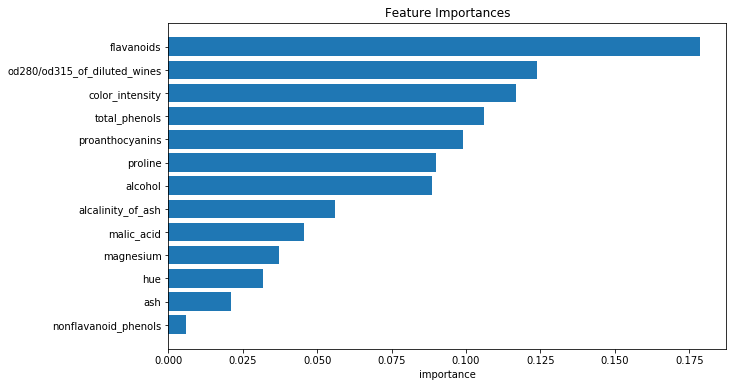

In [31]:
# Your code here.
create_plot_of_feature_importances(best_model, X)


**2.7) What are this model's top 3 features in order of descending importance?**

#### Your answer here 
1. flavanoids
2. od280/od315_of_diluted_wines
3. color_intensity

## Principal Components Analysis [Suggested Time: 20 min]

### Training a model with PCA-extracted features

In this section, you'll apply the unsupervised learning technique of Principal Components Analysis to the wine dataset. 

You'll use the principal components of the dataset as features in a machine learning model. You'll use the extracted features to train a vanilla Random Forest Classifier, and compare model performance to a model trained without PCA-extracted features. 

In the cell below, we import the data for you, and we split the data into training and test sets. 

In [32]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

wine = load_wine()
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'class'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3.1) Fit PCA to the training data.** 

Call the PCA instance you'll create `wine_pca`. Set `n_components=0.9` and make sure to use `random_state = 42`.

_Hint: Make sure to include necessary imports for **preprocessing the data!**_

In [38]:
# Your code here 
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
wine_pca = PCA(n_components=0.9, random_state=42)


**3.2) How many principal components are there in the fitted PCA object?**

_Hint: Look at the list of attributes of trained `PCA` objects in the scikit-learn documentation_

In [46]:
# Replace None with appropriate code 
print(len(wine_pca.components_.T))

13


*Hint: you should end up with 8 components.*

Next, you'll reduce the dimensionality of the training data to the number of components that explain at least 90% of the variance in the data, and then you'll use this transformed data to fit a Random Forest classification model. 

You'll compare the performance of the model trained on the PCA-extracted features to the performance of a model trained using all features without feature extraction.

**3.3) Transform the training features into an array of reduced dimensionality using the `wine_pca` PCA object you've fit in the previous cell.** Call this array `X_train_pca`.

In [41]:
# Replace None with appropriate code  
X_train_pca = wine_pca.fit_transform(X_train)

Next, we create a dataframe from this array of transformed features and we inspect the first five rows of the dataframe for you. 

In [42]:
# Create a dataframe from this array of transformed features 
X_train_pca = pd.DataFrame(X_train_pca)

# Inspect the first five rows of the transformed features dataset 
X_train_pca.head()

,0
0,-157.493066
1,-65.581595
2,13.460491
3,142.908813
4,-447.424342


#### You will now use the PCA-extracted features to train a random forest classification model.

**3.4) Instantiate a vanilla Random Forest Classifier (call it `rfc`) and fit it to the transformed training data.** Set `random_state = 42`. 

In [53]:
# Replace None with appropriate code

rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,class_weight='balanced', n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

**3.5) Evaluate model performance on the test data and place model predictions in a variable called `y_pca_pred`.**

_Hint: Make sure to transform the test data the same way as you transformed the training data!!!_

In [54]:
# Your code here 
y_pca_pred = rfc.predict(X_test)

In the cell below, we print the classification report for the model performance on the test data. 

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pca_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Run the cell below to fit a vanilla Random Forest Classifier to the untransformed training data,  evaluate its performance on the untransformed test data, and print the classification report for the model. 

In [56]:
vanilla_rfc = RandomForestClassifier(random_state=42)
vanilla_rfc.fit(X_train, y_train)

y_pred = vanilla_rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.95      0.86      0.90        21
           2       0.93      0.93      0.93        14

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



C:\Users\adara\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**3.6) Compare model performance. Did the overall accuracy of the model improve when using the transformed features?**

##### Your answer here 
The performance of the model increased using the transformed features

## Clustering [Suggested Time: 30 min]

### Clustering Algorithms: k-means and hierarchical agglomerative clustering

#### 4.1) Using the gif below for reference, describe the steps of the k-means clustering algorithm.
* If the gif doesn't run, you may access it via [this link](images/centroid.gif).

<img src='images/centroid.gif'>

##### Your answer here
Randomly pick a set of group representatives. Assign all of the items to the nearest representative. Update the group representative to more accurately represent its members. Revisit all of the items, assigning them to their nearest group representative. Then repeat the steps until the loss metric is smallest

#### 4.2) In a similar way, describe the process behind Hierarchical Agglomerative Clustering.

##### Your answer here
Hierarchical Agglomerative clustering works in a “bottom-up” procedure. Each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) 

### k-means Clustering

For this question, you will apply k-means clustering to your now friend, the wine dataset. 

You will use scikit-learn to fit k-means clustering models, and you will determine the optimal number of clusters to use by looking at silhouette scores. 

We load the wine dataset for you in the cell below. 

In [57]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
wine = load_wine()
X = pd.DataFrame(X, columns = wine.feature_names)

**4.3) Write a function called `get_labels` that will find `k` clusters in a dataset of features `X`, and return the labels for each row of `X`.**

_Hint: Within the function, you'll need to:_
* instantiate a k-means clustering model (use `random_state = 1` for reproducibility),
* fit the model to the data, and
* return the labels for each point.

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Replace None and pass with appropriate code
def get_labels(k, X):
    
    # Instantiate a k-means clustering model with random_state=1 and n_clusters=k
    kmeans = KMeans(n_clusters=k, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=1)
    
    # Fit the model to the data
    y_pred = kmeans.fit_predict(X)
    
    # return the predicted labels for each row in the data
    return y_pred 

**4.4) Fit the k-means algorithm to the wine data for k values in the range 2 to 9 using the function you've written above. Obtain the silhouette scores for each trained k-means clustering model, and place the values in a list called `silhouette_scores`.** 

We have provided you with some starter code in the cell below.

_Hints: What imports do you need? Do you need to pre-process the data in any way before fitting the k-means clustering algorithm?_ 

In [67]:
# Your code here

silhouette_scores= []

for k in range(2, 10):
    labels = get_labels(k, X) 
    
    score = silhouette_score(X, labels, metric='euclidean')
    
    silhouette_scores.append(score)

Run the cell below to plot the silhouette scores obtained for each different value of k against k, the number of clusters we asked the algorithm to find. 

Text(0, 0.5, 'silhouette score')

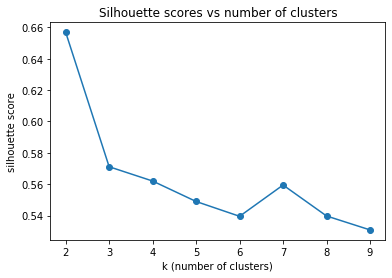

In [68]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

**4.5) Which value of k would you choose based on the plot of silhouette scores? How does this number compare to the number of classes in the wine dataset?**

Hint: this number should be <= 5.  If it's not, check your answer in the previous section.

#### Your answer here 
k = 2 because, at k = 2, indicate that the sample is far away from the neighboring clusters